# Exercise 1: Parameter Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

### a) Implement a model for classifying Fashion-MNIST. Use at least (in total) 5 hidden conv or fully connected layers with Tanh non-linearity. Use the defaults for parameter initialisation (i.e. don’t specify anything for initialising weights and biases).

In [2]:
# Load data from Keras instead of Pytorch
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, shuffle=True, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

# One hot encoding
n_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes=n_classes)
y_val = keras.utils.to_categorical(y_val, num_classes=n_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=n_classes)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

50000 50000 10000 10000
(50000, 28, 28)
(50000, 10)
(10000, 28, 28)
(10000, 10)
(10000, 28, 28)
(10000, 10)


In [3]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))
# First CNN layer
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=n_classes))
model.add(keras.layers.Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

### b) Use this as a baseline and train the model over (at least) 10 epochs (by using Adam with default settings). Remember the training/validation curves (cost, accuracy). Use input data normalisation.

In [4]:
# Input normalization
norm_layer = keras.layers.Normalization()
norm_layer.adapt(X_train)

model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))
model.add(norm_layer)
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation='tanh'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=n_classes))
model.add(keras.layers.Activation("softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 28, 28, 28)       57        
 n)                                                              
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        8096      
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)       

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=["accuracy"]
             )
nepochs = 10
batch_size = 64

baseline_log = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=nepochs,
    validation_data=(X_val, y_val),
)

Epoch 1/10
782/782 [==============================] - 11s 6ms/step - loss: 0.4110 - accuracy: 0.8523 - val_loss: 0.3353 - val_accuracy: 0.8839
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2915 - accuracy: 0.8963 - val_loss: 0.2857 - val_accuracy: 0.8971
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2583 - accuracy: 0.9076 - val_loss: 0.2648 - val_accuracy: 0.9012
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2339 - accuracy: 0.9141 - val_loss: 0.2880 - val_accuracy: 0.8990
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2234 - accuracy: 0.9189 - val_loss: 0.2564 - val_accuracy: 0.9041
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2112 - accuracy: 0.9237 - val_loss: 0.2599 - val_accuracy: 0.9075
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1970 - accuracy: 0.9283 - val_loss: 0.2664 - val_accuracy: 0.9105
Epoch

### c) Learn how you can change the weights and bias initialisers for MLP and CNN layers and for your model in your framework of choice.
### d) Now play with other initialisers. Train the model for each setting over (at least) 10 epochs and remember the resulting training /validation curves.

In [6]:
from tensorflow.keras import initializers

def get_model(weight_initializer, bias_initializer, activation="tanh"):
    norm_layer = keras.layers.Normalization()
    norm_layer.adapt(X_train)
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    model.add(norm_layer)
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation=activation, kernel_initializer=weight_initializer, bias_initializer=bias_initializer))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation=activation, kernel_initializer=weight_initializer, bias_initializer=bias_initializer))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation=activation, kernel_initializer=weight_initializer, bias_initializer=bias_initializer))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation=activation, kernel_initializer=weight_initializer, bias_initializer=bias_initializer))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation=activation, kernel_initializer=weight_initializer, bias_initializer=bias_initializer))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='same', activation=activation, kernel_initializer=weight_initializer, bias_initializer=bias_initializer))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=n_classes, kernel_initializer=weight_initializer, bias_initializer=bias_initializer))
    model.add(keras.layers.Activation("softmax"))
    return model
    
zero_zero_model = get_model(weight_initializer=keras.initializers.Constant(0), bias_initializer=keras.initializers.Constant(0))
normal_zero_model = get_model(weight_initializer=keras.initializers.RandomNormal(), bias_initializer=keras.initializers.Constant(0))
uniform_zero_model = get_model(weight_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5), bias_initializer=keras.initializers.Constant(0))
glorot_zero_model = get_model(weight_initializer=keras.initializers.GlorotNormal(), bias_initializer=keras.initializers.Constant(0))
he_zero_model = get_model(weight_initializer=keras.initializers.HeNormal(), bias_initializer=keras.initializers.Constant(0), activation="relu")

In [7]:
def train_model(model):
    model.compile(
        loss=keras.losses.categorical_crossentropy,
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    log = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=nepochs,
        validation_data=(X_val, y_val),
    )
    return log

zero_zero_model_log = train_model(zero_zero_model)
normal_zero_model_log = train_model(normal_zero_model)
uniform_zero_model_log = train_model(uniform_zero_model)
glorot_zero_model_log = train_model(glorot_zero_model)
he_zero_model_log = train_model(he_zero_model)

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1016
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0947
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0947
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0947
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3027 - val_accuracy: 0.0947
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1015
Epoch 

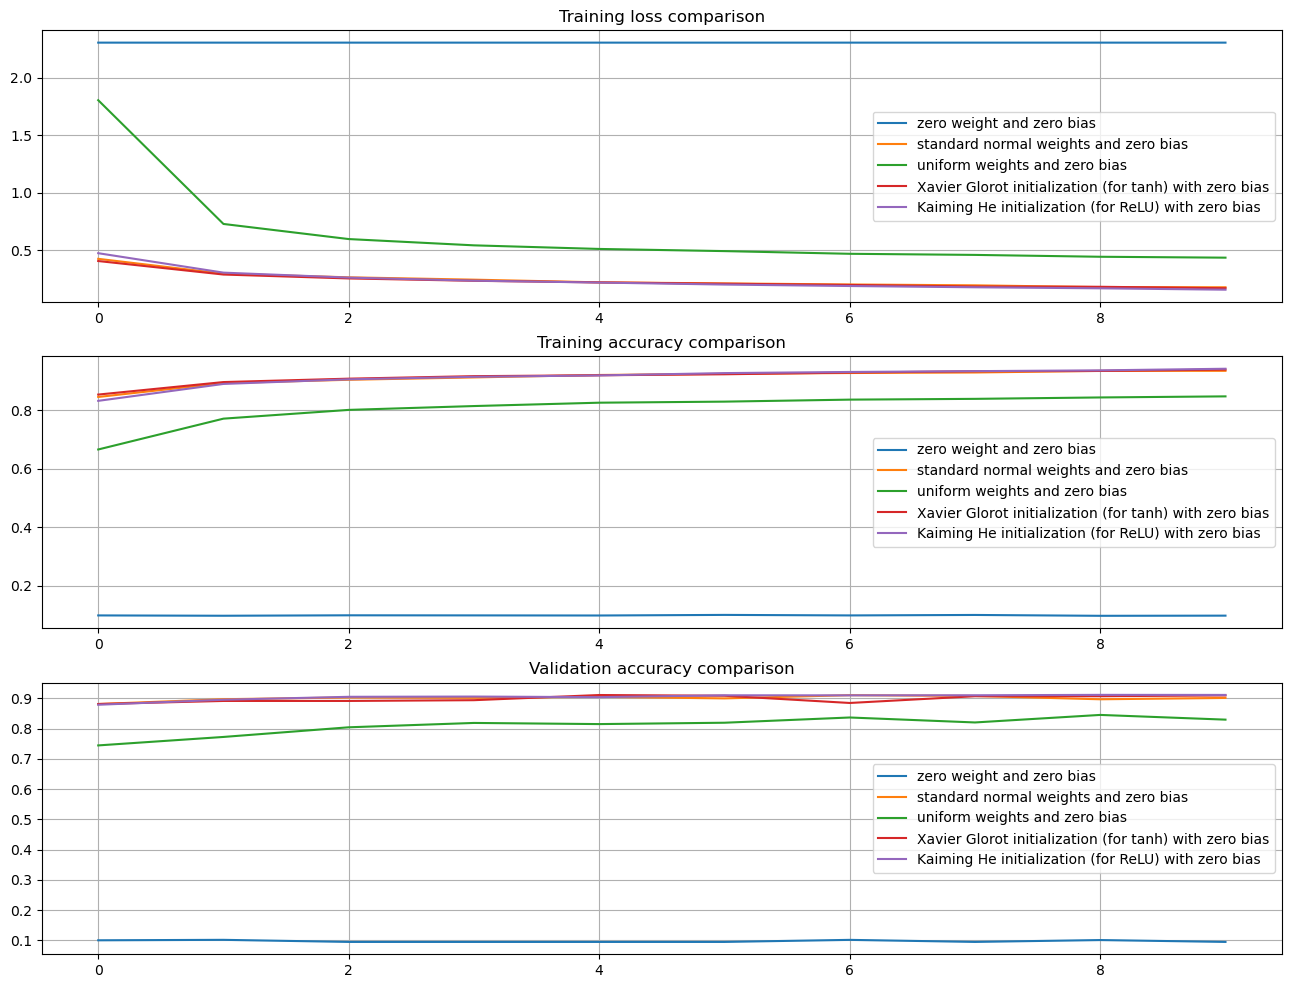

In [8]:
fig, axs = plt.subplots(figsize=(16,12), nrows=3, ncols=1)
# Training loss
axs[0].set_title("Training loss comparison")
attribute = "loss"
axs[0].plot(zero_zero_model_log.history[attribute], label='zero weight and zero bias')
axs[0].plot(normal_zero_model_log.history[attribute], label='standard normal weights and zero bias')
axs[0].plot(uniform_zero_model_log.history[attribute], label='uniform weights and zero bias')
axs[0].plot(glorot_zero_model_log.history[attribute], label='Xavier Glorot initialization (for tanh) with zero bias')
axs[0].plot(he_zero_model_log.history[attribute], label='Kaiming He initialization (for ReLU) with zero bias')
axs[0].legend()
axs[0].grid()
# Training accuracy
axs[1].set_title("Training accuracy comparison")
attribute = "accuracy"
axs[1].plot(zero_zero_model_log.history[attribute], label='zero weight and zero bias')
axs[1].plot(normal_zero_model_log.history[attribute], label='standard normal weights and zero bias')
axs[1].plot(uniform_zero_model_log.history[attribute], label='uniform weights and zero bias')
axs[1].plot(glorot_zero_model_log.history[attribute], label='Xavier Glorot initialization (for tanh) with zero bias')
axs[1].plot(he_zero_model_log.history[attribute], label='Kaiming He initialization (for ReLU) with zero bias')
axs[1].legend()
axs[1].grid()
# Validation accuracy
axs[2].set_title("Validation accuracy comparison")
attribute = "val_accuracy"
axs[2].plot(zero_zero_model_log.history[attribute], label='zero weight and zero bias')
axs[2].plot(normal_zero_model_log.history[attribute], label='standard normal weights and zero bias')
axs[2].plot(uniform_zero_model_log.history[attribute], label='uniform weights and zero bias')
axs[2].plot(glorot_zero_model_log.history[attribute], label='Xavier Glorot initialization (for tanh) with zero bias')
axs[2].plot(he_zero_model_log.history[attribute], label='Kaiming He initialization (for ReLU) with zero bias')
axs[2].legend()
axs[2].grid()
plt.show()

We can see from these plots that the zero weight and zero bias initialization is useless because it cannot learn anything because all affine transofrmations will be zero with these parameters. Furthermore the uniform distribution is also suboptimal. Though the model improves and learns, it's not good to have the same weights everywhere as start parameters. The Glorot, Kaiming and Standard (random) initialization work almost equally well. This matches with the theory -> use some form of random initialization